## Introduction to TensorFlow for Artificial Intelligence, Machine Learning, and Deep Learning

### Week 1 (Template for Keras)

In [ ]:
import tensorflow as tf
import numpy as np
import os

In [ ]:
print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


In [ ]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

In [ ]:
model.compile(optimizer='sgd', loss='mean_squared_error')

In [ ]:
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

In [ ]:
model.fit(xs, ys, epochs=500)

In [ ]:
print(model.predict([10.0]))

### Week 2 (Simple DNN) & 3 (CNN)

In [47]:
import os
#print(os.environ)
#os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
#print(os.environ["CUDA_VISIBLE_DEVICES"])
import time

In [48]:
import tensorflow as tf
print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

2.1.0
Num GPUs Available:  1


In [49]:
mnist = tf.keras.datasets.fashion_mnist

In [50]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

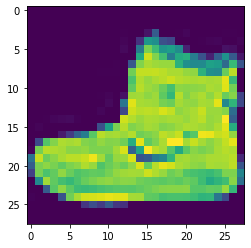

In [51]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
#print(training_labels[0])
#print(training_images[0])

In [66]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

training_images_cnn=training_images.reshape(60000, 28, 28, 1)
test_images_cnn = test_images.reshape(10000, 28, 28, 1)

In [67]:
print(training_images.shape)
print(test_images.shape)
print(training_images_cnn.shape)
print(test_images_cnn.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [56]:
modeldnn = tf.keras.models.Sequential([
                                    #tf.keras.layers.Flatten(input_shape=(28,28)), 
                                    tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

#Why doesn't it error out when last layer doesn't match number of classes?

modelcnn = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2), 
                                    tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [63]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True
callbacks = myCallback()
        
modeldnn.compile(optimizer = tf.optimizers.Adam(), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
modelcnn.compile(optimizer = tf.optimizers.Adam(), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
modeldnn.summary()
modelcnn.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_15 (Flatten)         multiple                  0         
_________________________________________________________________
dense_31 (Dense)             multiple                  401920    
_________________________________________________________________
dense_32 (Dense)             multiple                  262656    
_________________________________________________________________
dense_33 (Dense)             multiple                  5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
________________________

In [70]:

start = time.time()
#model.fit(training_images, training_labels, epochs=5, batch_size=128)
modeldnn.fit(training_images, training_labels, epochs=20, callbacks=[callbacks])
end = time.time()
print(end - start)
test_loss = modeldnn.evaluate(test_images, test_labels)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 103us/sample - loss: 0.6693 - accuracy: 0.7560
Epoch 2/20
60000/60000 [==============================] - 6s 100us/sample - loss: 0.4474 - accuracy: 0.8367
Epoch 3/20
60000/60000 [==============================] - 6s 100us/sample - loss: 0.3953 - accuracy: 0.8562
Epoch 4/20
60000/60000 [==============================] - 6s 100us/sample - loss: 0.3582 - accuracy: 0.8686
Epoch 5/20
60000/60000 [==============================] - 6s 100us/sample - loss: 0.3316 - accuracy: 0.8782
Epoch 6/20
60000/60000 [==============================] - 6s 100us/sample - loss: 0.3133 - accuracy: 0.8843
Epoch 7/20
60000/60000 [==============================] - 6s 100us/sample - loss: 0.2997 - accuracy: 0.8883
Epoch 8/20
60000/60000 [==============================] - 6s 99us/sample - loss: 0.2854 - accuracy: 0.8945
Epoch 9/20
60000/60000 [==============================] - 6s 100us/sample - loss: 0.2758 - accuracy: 0.8966
Epoch 

In [72]:
test_loss = modeldnn.evaluate(test_images, test_labels)
print(test_loss)

10000/10000 [==============================] - 1s 88us/sample - loss: 0.3455 - accuracy: 0.8833
[0.3454980036616325, 0.8833]


In [74]:
start = time.time()
#model.fit(training_images, training_labels, epochs=5, batch_size=128)
modelcnn.fit(training_images_cnn, training_labels, epochs=20, callbacks=[callbacks])
end = time.time()
print(end - start)
test_loss = modelcnn.evaluate(test_images_cnn, test_labels)


Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 211us/sample - loss: 0.2342 - accuracy: 0.9105
Epoch 2/20
60000/60000 [==============================] - 12s 207us/sample - loss: 0.2239 - accuracy: 0.9150
Epoch 3/20
60000/60000 [==============================] - 12s 207us/sample - loss: 0.2153 - accuracy: 0.9175
Epoch 4/20
60000/60000 [==============================] - 12s 207us/sample - loss: 0.2049 - accuracy: 0.9211
Epoch 5/20
60000/60000 [==============================] - 12s 204us/sample - loss: 0.1968 - accuracy: 0.9244
Epoch 6/20
60000/60000 [==============================] - 12s 204us/sample - loss: 0.1857 - accuracy: 0.9282
Epoch 7/20
60000/60000 [==============================] - 12s 204us/sample - loss: 0.1762 - accuracy: 0.9309
Epoch 8/20
60000/60000 [==============================] - 12s 204us/sample - loss: 0.1690 - accuracy: 0.9347
Epoch 9/20
60000/60000 [==============================] - 12s 205us/sample - loss: 0.1577 - accuracy: 0.9

In [ ]:
classifications = model.predict(test_images)

print(classifications[1])

In [79]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4
 2]


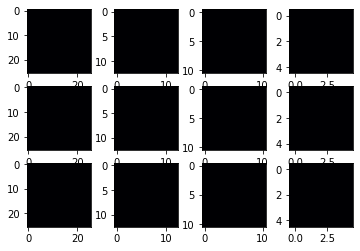

In [80]:
#not working

import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in modelcnn.layers]
activation_model = tf.keras.models.Model(inputs = modelcnn.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images_cnn[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images_cnn[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images_cnn[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

### Week 4 (Image Generator + Validation Loop)

In [113]:
!pwd

/home/jupyter/coursera_deep_learning_specialization


In [115]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2020-03-30 07:06:45--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 2607:f8b0:400e:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/home/jupyter/coursera_deep_learning_specialization/images/horse-or-human.zip’

/home/jupyter/cours 100%[===================>] 142.65M   162MB/s    in 0.9s    

2020-03-30 07:06:46 (162 MB/s) - ‘/home/jupyter/coursera_deep_learning_specialization/images/horse-or-human.zip’ saved [149574867/149574867]



In [89]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2020-03-30 05:50:46--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 2607:f8b0:400e:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  --.-KB/s    in 0.07s   

2020-03-30 05:50:46 (148 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



In [116]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

FileNotFoundError: [Errno 2] No such file or directory: '/home/jupyter/coursera_deep_learning_specialization/images/validation-horse-or-human.zip'

In [91]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

In [92]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_hames = os.listdir(validation_horse_dir)
print(validation_horse_hames[:10])

validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

['horse23-7.png', 'horse29-9.png', 'horse13-3.png', 'horse28-9.png', 'horse09-0.png', 'horse50-3.png', 'horse20-3.png', 'horse03-0.png', 'horse20-6.png', 'horse33-3.png']
['human15-29.png', 'human06-12.png', 'human15-18.png', 'human08-28.png', 'human13-30.png', 'human07-08.png', 'human10-29.png', 'human04-09.png', 'human11-01.png', 'human14-04.png']
['horse5-018.png', 'horse6-345.png', 'horse5-065.png', 'horse5-342.png', 'horse2-294.png', 'horse5-002.png', 'horse1-276.png', 'horse5-123.png', 'horse5-478.png', 'horse1-000.png']
['valhuman02-15.png', 'valhuman03-24.png', 'valhuman02-21.png', 'valhuman03-15.png', 'valhuman02-22.png', 'valhuman05-03.png', 'valhuman03-22.png', 'valhuman03-09.png', 'valhuman04-22.png', 'valhuman05-26.png']


In [93]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


In [95]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

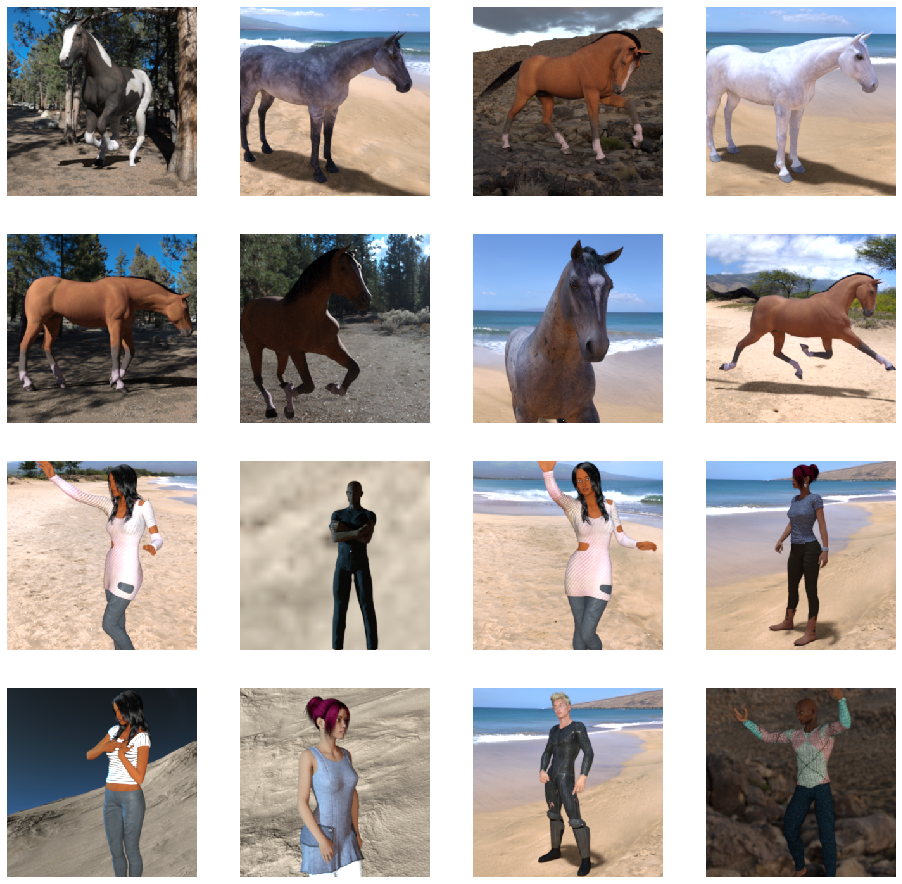

In [96]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [97]:
import tensorflow as tf

In [99]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [100]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 33, 33, 64)      

In [102]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [103]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [104]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 8 steps, validate for 8 steps
Epoch 1/15
8/8 [==============================] - 9s 1s/step - loss: 0.9464 - accuracy: 0.5829 - val_loss: 1.3106 - val_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 8s 1s/step - loss: 0.7452 - accuracy: 0.5573 - val_loss: 0.8168 - val_accuracy: 0.5625
Epoch 3/15
8/8 [==============================] - 8s 1s/step - loss: 0.4358 - accuracy: 0.7998 - val_loss: 0.8808 - val_accuracy: 0.8203
Epoch 4/15
8/8 [==============================] - 8s 1s/step - loss: 0.3470 - accuracy: 0.8721 - val_loss: 0.4586 - val_accuracy: 0.8828
Epoch 5/15
8/8 [==============================] - 8s 1s/step - loss: 0.1828 - accuracy: 0.9321 - val_loss: 0.4991 - val_accuracy: 0.9102
Epoch 6/15
8/8 [==============================] - 8s 998ms/step - loss: 0.3194 - accuracy: 0.8754 - val_loss: 0.9757 - val_accuracy: 0.8398
Epoch 7/15
8/8 [==============================] - 8s 1s/step - loss: 0.0918 - accurac

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


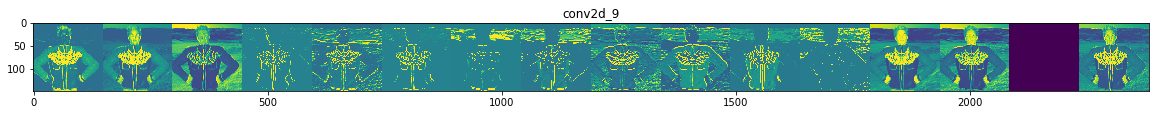

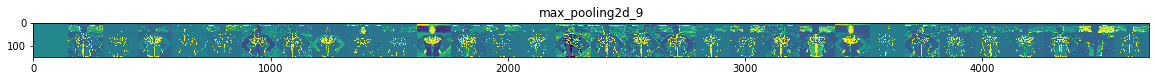

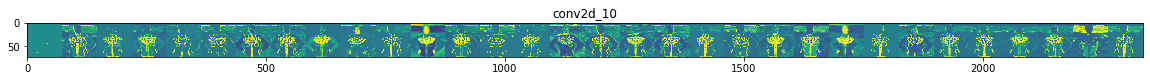

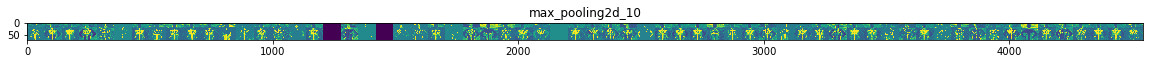

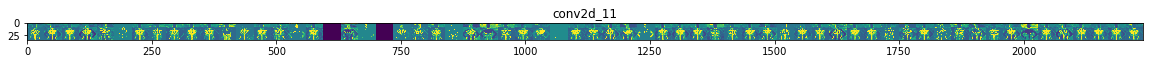

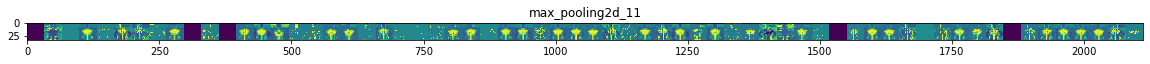

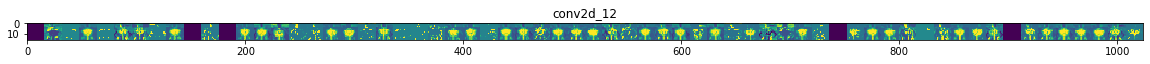

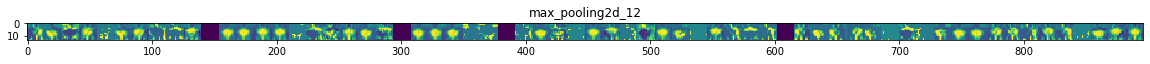

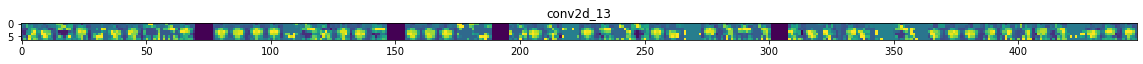

In [105]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')